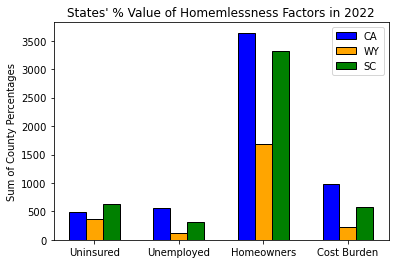

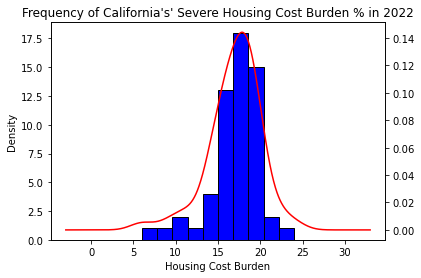

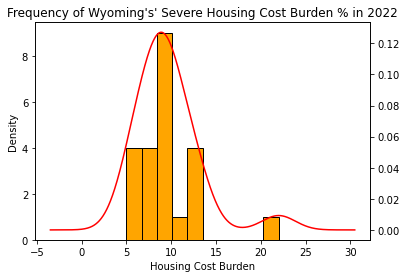

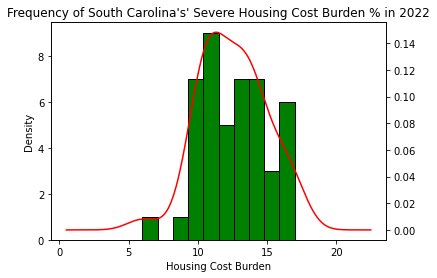

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def openAll(fileName):
    df = pd.read_csv(fileName)
    return df

def getData(fileName):
    readFile = openAll(fileName)
    return readFile

def getStateYear(readFile, year, state):
    readYear = readFile.loc[lambda readFile: readFile["Year"] == year]
    readStateYear = readYear.loc[lambda readYear: readYear["State"] == state]
    return readStateYear

def sumCells(data, column):
    returnValue = 0
    for cell in data[column]:
        returnValue += cell
    return returnValue

def percentBarGraph2022(readFile):
    stateValues = [[], [], []]
    states = ["California", "Wyoming", "South Carolina"]
    for i in range(len(stateValues)):
        state2022 = getStateYear(readFile, 2022, states[i])
        stateValues[i].append(sumCells(state2022, "Uninsured %"))
        stateValues[i].append(sumCells(state2022, "Unemployed %"))
        stateValues[i].append(sumCells(state2022, "Homeowners %"))
        stateValues[i].append(sumCells(state2022, "Severe Housing Cost Burden %"))
    xvalue = np.arange(4)
    w = 0.2
    ax = plt.subplot(111)
    axisLabels = ["Uninsured", "Unemployed", "Homeowners", "Cost Burden"]
    california = ax.bar(xvalue-0.2, stateValues[0], width = w, align='center', color="blue", edgecolor = "black")
    wyoming = ax.bar(xvalue, stateValues[1], width = w, align='center', color="orange", edgecolor = "black")
    southCarolina = ax.bar(xvalue+0.2, stateValues[2], width = w, align='center', color="green", edgecolor = "black")
    plt.xticks(xvalue, axisLabels)
    ax.legend((california[0], wyoming[0], southCarolina[0]), ('CA', 'WY', 'SC'))
    plt.title("States' % Value of Homemlessness Factors in 2022")
    plt.ylabel("Sum of County Percentages")
    plt.show()

def scatterUninsuredUnemployedNum2022(readFile):
    states = ["California", "Wyoming", "South Carolina"]
    readYear = readFile.loc[lambda readFile: readFile["Year"] == 2022]
    for i in range(len(states)):
        currentStateX = []
        currentStateY = []
        readStateYear = readYear.loc[lambda readYear: readYear["State"] == states[i]]
        for cell in readStateYear["Uninsured #"]:
            currentStateY.append(cell)
        for cell in readStateYear["Unemployed #"]:
            currentStateX.append(cell)
        plt.scatter(currentStateX, currentStateY)
        #plt.title()
        plt.show()
    
def histHousingBurden2022(readFile):
    states = ["California", "Wyoming", "South Carolina"]
    colors = ["blue", "orange", "green"]
    readYear = readFile.loc[lambda readFile: readFile["Year"] == 2022]
    for i in range(len(states)):
        currentState = []
        readStateYear = readYear.loc[lambda readYear: readYear["State"] == states[i]]
        for cell in readStateYear["Severe Housing Cost Burden %"]:
            currentState.append(cell)
        plt.hist(currentState, color=colors[i], edgecolor = "black")
        plt.title("Frequency of " + states[i] + "'s' Severe Housing Cost Burden % in 2022")
        plt.xlabel("Housing Cost Burden")
        plt.ylabel("Frequency")
        readStateYear["Severe Housing Cost Burden %"].plot.kde(color='red', secondary_y=True)
        plt.show()
    
def interpretData():
    pd.set_option('display.max_rows', None) # Allows for all rows to be printed
    readFile = getData("Project Data.csv")
    
    # Present the data
    percentBarGraph2022(readFile)
    
    # Analyze the trend of uninsured # vs unemployed # in 2022 for each state
    #scatterUninsuredUnemployedNum2022(readFile) 
    # Nikki did these already
    
    # Analyze the frequency of severe housing cost burden % in 2022 for each state
    histHousingBurden2022(readFile)
    
    #TODO: make plot that analyzes the trend of something between years
    #Maybe scatterplot for same state with different colors for each year
    
    
interpretData()